<a href="https://colab.research.google.com/github/mrunmayi111/Loan-Default-Prediction-using-Machine-Learning/blob/main/GOOGLEFORM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score
import xgboost as xgb


In [ ]:
df = pd.read_excel('loan_default_psychology_modified_dataset.xlsx')

In [ ]:
weights = {
    'Financial_Discipline': 0.30,
    'Risk_Tolerance': 0.15,
    'Liquidity': 0.20,
    'Debt_Attitude': 0.10,
    'Stress_Management': 0.10,
    'Purposeful_Borrowing': 0.05,
    'Impulsivity': 0.05,
    'Previous_Loan_Management': 0.05
}


In [ ]:

df['Financial_Discipline'] = df[['Financial_Planning', 'Spending_Behavior']].mean(axis=1)
df['Risk_Tolerance'] = df[['Risk_Appetite']].mean(axis=1)
df['Liquidity'] = df[['Emergency_Fund']].mean(axis=1)
df['Debt_Attitude'] = df[['Debt_Attitude']].mean(axis=1)
df['Stress_Management'] = df[['Stress_Management', 'Job_Security']].mean(axis=1)
df['Purposeful_Borrowing'] = df[['Loan_Purpose']].mean(axis=1)
df['Impulsivity'] = df[['Impulsivity']].mean(axis=1)
df['Previous_Loan_Management'] = df[['Previous_Loan_Management']].mean(axis=1)

df['PRS'] = (
    df['Financial_Discipline'] * weights['Financial_Discipline'] +
    df['Risk_Tolerance'] * weights['Risk_Tolerance'] +
    df['Liquidity'] * weights['Liquidity'] +
    df['Debt_Attitude'] * weights['Debt_Attitude'] +
    df['Stress_Management'] * weights['Stress_Management'] +
    df['Purposeful_Borrowing'] * weights['Purposeful_Borrowing'] +
    df['Impulsivity'] * weights['Impulsivity'] +
    df['Previous_Loan_Management'] * weights['Previous_Loan_Management']
)


In [ ]:
df['PRS'] = df['PRS'] * 20
print(df[['PRS']].head())


    PRS
0  63.0
1  62.0
2  54.0
3  82.0
4  48.0


In [ ]:

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}


grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='roc_auc', cv=5)
grid_search.fit(X_train, y_train)


print("Best Params:", grid_search.best_params_)
best_model = grid_search.best_estimator_
print("Best AUC-ROC Score:", roc_auc_score(y_test, best_model.predict_proba(X_test)[:,1]))


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:56:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:56:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:56:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:56:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:56:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

Best Params: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
Best AUC-ROC Score: 0.44040464743589747


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:56:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


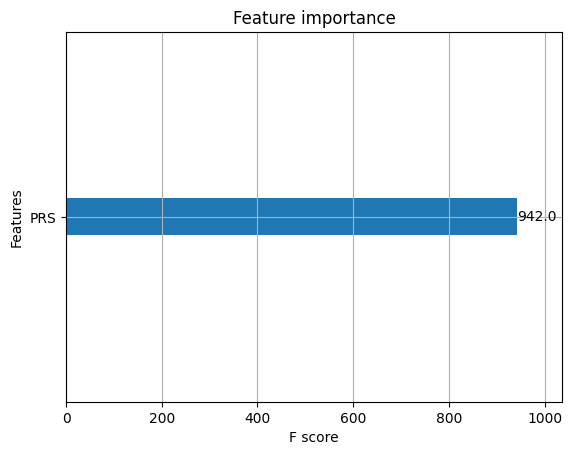

In [ ]:
import matplotlib.pyplot as plt
xgb.plot_importance(xgb_model)
plt.show()


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [19:38:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.51      0.52       100
           1       0.53      0.55      0.54       100

    accuracy                           0.53       200
   macro avg       0.53      0.53      0.53       200
weighted avg       0.53      0.53      0.53       200

AUC-ROC Score: 0.5659000000000001


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [19:38:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [19:38:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [19:38:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [19:38:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [19:38:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

Best Params: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 300}
Best AUC-ROC Score: 0.5494


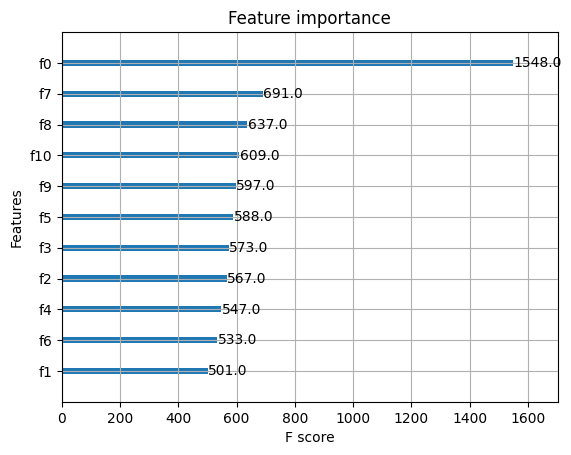

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score
import xgboost as xgb
import matplotlib.pyplot as plt


df = pd.read_excel('loan_default_psychology_modified_dataset.xlsx')

df['Loan_Default'] = np.random.randint(0, 2, size=1000)


weights = {
    'Financial_Planning': 0.20,
    'Spending_Behavior': 0.20,
    'Risk_Appetite': 0.15,
    'Emergency_Fund': 0.15,
    'Debt_Attitude': 0.10,
    'Stress_Management': 0.10,
    'Job_Security': 0.05,
    'Loan_Purpose': 0.05,
    'Impulsivity': 0.05,
    'Previous_Loan_Management': 0.05
}


df['PRS'] = (
    df['Financial_Planning'] * weights['Financial_Planning'] +
    df['Spending_Behavior'] * weights['Spending_Behavior'] +
    df['Risk_Appetite'] * weights['Risk_Appetite'] +
    df['Emergency_Fund'] * weights['Emergency_Fund'] +
    df['Debt_Attitude'] * weights['Debt_Attitude'] +
    df['Stress_Management'] * weights['Stress_Management'] +
    df['Job_Security'] * weights['Job_Security'] +
    df['Loan_Purpose'] * weights['Loan_Purpose'] +
    df['Impulsivity'] * weights['Impulsivity'] +
    df['Previous_Loan_Management'] * weights['Previous_Loan_Management']
)


df['PRS'] = df['PRS'] * 20


features = [
    'PRS', 'Financial_Planning', 'Spending_Behavior', 'Risk_Appetite',
    'Emergency_Fund', 'Debt_Attitude', 'Stress_Management',
    'Job_Security', 'Loan_Purpose', 'Impulsivity', 'Previous_Loan_Management']

X = df[features]
y = df['Loan_Default']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')


xgb_model.fit(X_train, y_train)


y_pred = xgb_model.predict(X_test)


print("Classification Report:")
print(classification_report(y_test, y_pred))
print("AUC-ROC Score:", roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1]))


param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.1, 0.2]
}

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='roc_auc', cv=5)
grid_search.fit(X_train, y_train)


print("Best Params:", grid_search.best_params_)
best_model = grid_search.best_estimator_
print("Best AUC-ROC Score:", roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1]))


xgb.plot_importance(best_model)
plt.show()


In [ ]:


from sklearn.metrics import accuracy_score


accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.53


Fitting 5 folds for each of 144 candidates, totalling 720 fits


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [19:53:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Params: {'classifier__colsample_bytree': 1.0, 'classifier__learning_rate': 0.01, 'classifier__max_depth': 9, 'classifier__n_estimators': 100, 'classifier__subsample': 1.0}
Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.49      0.51       100
           1       0.52      0.56      0.54       100

    accuracy                           0.53       200
   macro avg       0.53      0.53      0.52       200
weighted avg       0.53      0.53      0.52       200

AUC-ROC Score: 0.5347


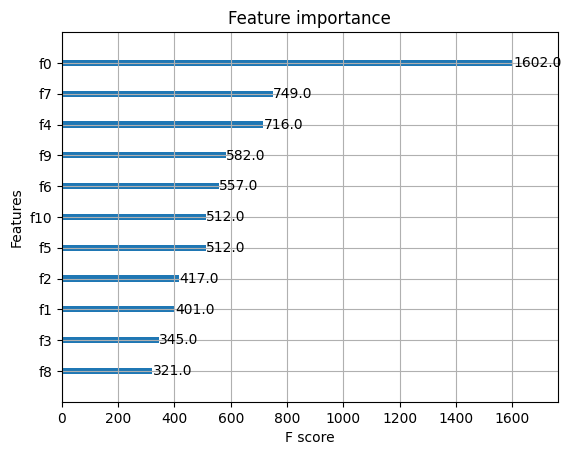

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, roc_auc_score
import xgboost as xgb
import matplotlib.pyplot as plt


df = pd.read_excel('loan_default_psychology.xlsx')


weights = {
    'Financial_Planning': 0.20,
    'Spending_Behavior': 0.20,
    'Risk_Appetite': 0.15,
    'Emergency_Fund': 0.15,
    'Debt_Attitude': 0.10,
    'Stress_Management': 0.10,
    'Job_Security': 0.05,
    'Loan_Purpose': 0.05,
    'Impulsivity': 0.05,
    'Previous_Loan_Management': 0.05
}

df['PRS'] = (
    df['Financial_Planning'] * weights['Financial_Planning'] +
    df['Spending_Behavior'] * weights['Spending_Behavior'] +
    df['Risk_Appetite'] * weights['Risk_Appetite'] +
    df['Emergency_Fund'] * weights['Emergency_Fund'] +
    df['Debt_Attitude'] * weights['Debt_Attitude'] +
    df['Stress_Management'] * weights['Stress_Management'] +
    df['Job_Security'] * weights['Job_Security'] +
    df['Loan_Purpose'] * weights['Loan_Purpose'] +
    df['Impulsivity'] * weights['Impulsivity'] +
    df['Previous_Loan_Management'] * weights['Previous_Loan_Management']
)


df['PRS'] = df['PRS'] * 20


features = [
    'PRS', 'Financial_Planning', 'Spending_Behavior', 'Risk_Appetite',
    'Emergency_Fund', 'Debt_Attitude', 'Stress_Management',
    'Job_Security', 'Loan_Purpose', 'Impulsivity', 'Previous_Loan_Management'
]
X = df[features]
y = df['Loan_Default']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), features)
    ])


pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))
])


param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [3, 5, 7, 9],
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__subsample': [0.8, 1.0],
    'classifier__colsample_bytree': [0.8, 1.0]
}


grid_search = GridSearchCV(pipeline, param_grid, scoring='roc_auc', cv=5, verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters and AUC score after tuning
print("Best Params:", grid_search.best_params_)
best_model = grid_search.best_estimator_


y_pred = best_model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("AUC-ROC Score:", roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1]))


xgb.plot_importance(best_model.named_steps['classifier'])
plt.show()
